In [2]:
# Import required packages
from pgmpy.models import BayesianModel as BN
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

In [5]:
# Here we create the bayesian network model
bnet = BN(
    [
        # Subject Arcs
        ('CO', 'H'),
        ('CA', 'H'),
        
        # Evidence Arcs
        ('CO', 'EvCO'),
        ('CA', 'EvCA'),
        ('H', 'EvH')
    ]
)

# Then we create all the CPDs
# The CPD values are from False to True values

# Subjects CPDs

ca_cpd = TabularCPD(
    variable='CA',
    variable_card=2,
    values=[
        [0.5, 0.5]
    ]
)

print('\nSubject CPD for CA')
print(ca_cpd)

co_cpd = TabularCPD(
    variable='CO',
    variable_card=2,
    values=[
        [0.5, 0.5]
    ]
)

print('\nSubject CPD for CO')
print(co_cpd)

h_cpd = TabularCPD(
    variable='H',
    variable_card=2,
    values=[
        [0.9, 0.65, 0.65, 0.2],
        [0.1, 0.35, 0.35, 0.8]],
    evidence=['CA', 'CO'],
    evidence_card=[2, 2]
)

print('\nSubject CPD for H')
print(h_cpd)

subjects_cpds = [
    ca_cpd,
    co_cpd,
    h_cpd
]

# Evidence Nodes

ev_ca_cpd = TabularCPD(
    variable='EvCA',
    variable_card=2,
    values=[
        [0.8, 0.1],
        [0.2, 0.9]
    ],
    evidence=['CA'],
    evidence_card=[2]
)

print('\nEvidence CPD for CA')
print(ev_ca_cpd)

ev_co_cpd = TabularCPD(
    variable='EvCO',
    variable_card=2,
    values=[
        [0.8, 0.1],
        [0.2, 0.9]
    ],
    evidence=['CO'],
    evidence_card=[2]
)

print('\nEvidence CPD for CO')
print(ev_co_cpd)

ev_h_cpd = TabularCPD(
    variable='EvH',
    variable_card=2,
    values=[
        [0.8, 0.1],
        [0.2, 0.9]
    ],
    evidence=['H'],
    evidence_card=[2]
)

print('\nEvidence CPD for H')
print(ev_h_cpd)

evidences_cpds = [
    ev_ca_cpd,
    ev_co_cpd,
    ev_h_cpd
]

cpds = subjects_cpds + evidences_cpds

bnet.add_cpds(*cpds)
bnet.check_model()


Subject CPD for CA
+-------+-----+
| CA(0) | 0.5 |
+-------+-----+
| CA(1) | 0.5 |
+-------+-----+

Subject CPD for CO
+-------+-----+
| CO(0) | 0.5 |
+-------+-----+
| CO(1) | 0.5 |
+-------+-----+

Subject CPD for H
+------+-------+-------+-------+-------+
| CA   | CA(0) | CA(0) | CA(1) | CA(1) |
+------+-------+-------+-------+-------+
| CO   | CO(0) | CO(1) | CO(0) | CO(1) |
+------+-------+-------+-------+-------+
| H(0) | 0.9   | 0.65  | 0.65  | 0.2   |
+------+-------+-------+-------+-------+
| H(1) | 0.1   | 0.35  | 0.35  | 0.8   |
+------+-------+-------+-------+-------+

Evidence CPD for CA
+---------+-------+-------+
| CA      | CA(0) | CA(1) |
+---------+-------+-------+
| EvCA(0) | 0.8   | 0.1   |
+---------+-------+-------+
| EvCA(1) | 0.2   | 0.9   |
+---------+-------+-------+

Evidence CPD for CO
+---------+-------+-------+
| CO      | CO(0) | CO(1) |
+---------+-------+-------+
| EvCO(0) | 0.8   | 0.1   |
+---------+-------+-------+
| EvCO(1) | 0.2   | 0.9   |
+-----

True

In [6]:
# Import packages for graphic visualization
import networkx as nx
import matplotlib.pyplot as plt

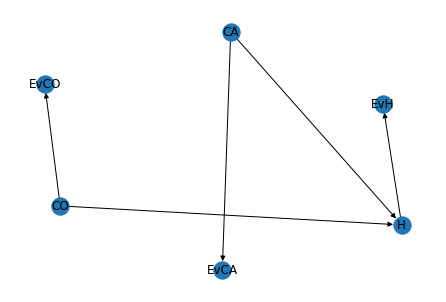

In [7]:
# Show graphic model
nx.draw(bnet, with_labels=True)
plt.show()

In [8]:
# Import inference structure
from pgmpy.inference import VariableElimination

In [9]:
# Create a inference object
bnet_infer = VariableElimination(bnet)

In [10]:
# Compute inference for CA when EvCA observation is True
print(bnet_infer.query(variables=['CA'], evidence={'EvCA': 1}))

Eliminating: CO: 100%|██████████| 4/4 [00:00<00:00, 327.51it/s]

+-------+-----------+
| CA    |   phi(CA) |
+=======+===========+
| CA(0) |    0.1818 |
+-------+-----------+
| CA(1) |    0.8182 |
+-------+-----------+


In [4]:
# Compute inference for CA when EvCA observation is True
print(bnet_infer.query(variables=['CA'], evidence={'EvCA': 1}))

NameError: name 'bnet_infer' is not defined

In [11]:
# Compute inference for CA when EvCA observation is True
print(bnet_infer.query(variables=['H']))

Eliminating: CO: 100%|██████████| 5/5 [00:00<00:00, 383.70it/s]

+------+----------+
| H    |   phi(H) |
+======+==========+
| H(0) |   0.5584 |
+------+----------+
| H(1) |   0.4416 |
+------+----------+
